In [30]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)


In [12]:
dataDir='./Dataset/Batch 0/'
dataType='val2017'
annFile='/home/wuyuanyi/Desktop/SHARP/instances_train2014.json'

In [13]:
import json
with open(annFile) as f:
    obj = json.load(f)
    print(len(obj['annotations']))
    for i, ann in enumerate(obj['annotations']):
        if ann is None:
            print(i)
        if 'image_id' not in ann.keys():
            print(ann)

258


In [14]:
coco=COCO(annFile)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [15]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
1 2

COCO supercategories: 
object


In [41]:
# random load image
image_keys = coco.imgs.keys()
image_count = len(image_keys)
selected_image_key = image_keys[random.randint(0, image_count)]
selected_image = coco.imgs[selected_image_key]
image_path = selected_image['file_name']

In [37]:
annIds = coco.getAnnIds(imgIds=selected_image_key, iscrowd=None)

In [44]:
selected_image_key

u'HWY2.jpg'

In [42]:
anns = coco.loadAnns(annIds)

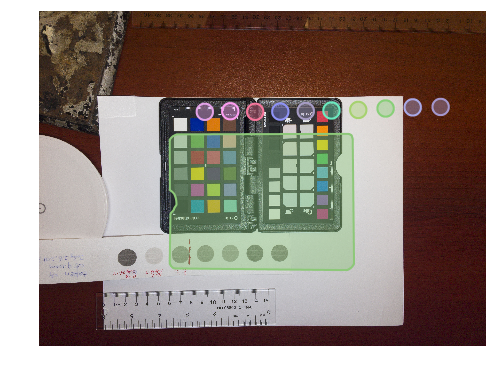

In [43]:
I = io.imread(image_path)
plt.imshow(I); plt.axis('off')
coco.showAnns(anns)

In [56]:
a = np.reshape(anns[0]['segmentation'][0],(-1,2))

KeyError: 0

In [57]:
imgIds = coco.getImgIds(catIds=1 );


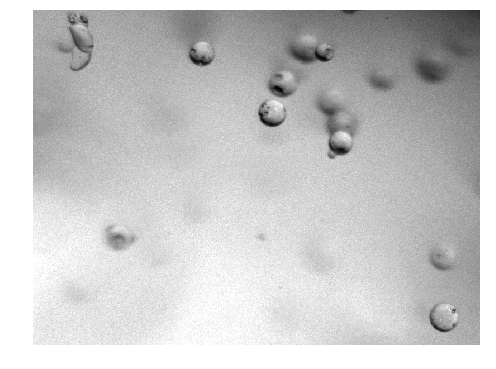

In [58]:
img = coco.loadImgs([imgIds[np.random.randint(0,len(imgIds))]])[0]
I = io.imread(img['file_name'])
plt.axis('off')
plt.imshow(I,cmap='gray')
plt.show()

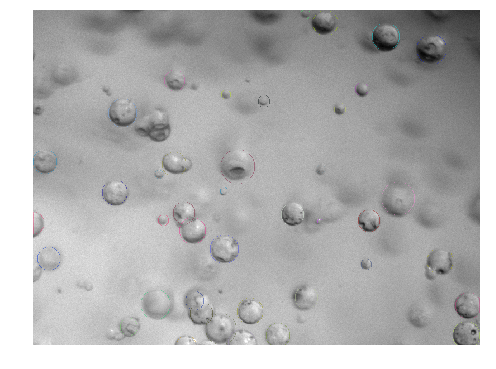

In [59]:
img = coco.loadImgs([imgIds[np.random.randint(0,len(imgIds))]])[0]
I = io.imread(img['file_name'])
plt.axis('off')
plt.imshow(I,cmap='gray')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

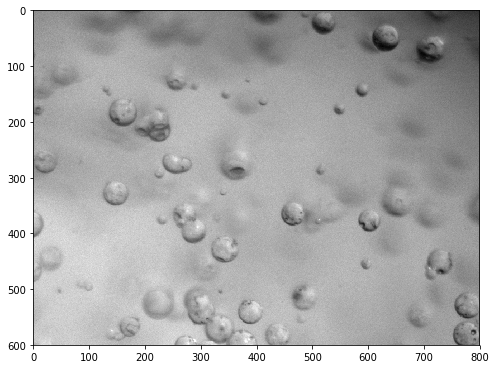

In [61]:
plt.imshow(I,cmap='gray')

In [63]:
import datetime

In [66]:
str(datetime.datetime.now())

'2018-04-28 17:14:46.434682'